In [1]:
# Show the presence of sampling artifacts on synthetic data.
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../code')
from artifacts import dft
from filters import residuum
from utils import load_img

def extract_residuum(input_img):
    # Using the mean kernel for the residual noise.
    # normalize error 0 - 100
    img_f = input_img / 255.0
    H = np.ones((3,3), dtype=np.float32) / 8
    H[2, 2] = 0

    return residuum(img_f, H)


def normalize_spectrum(spectrum: np.ndarray) -> np.ndarray:
    
    return  spectrum / (spectrum.shape[0] * spectrum.shape[1])


In [2]:
synthetic_img_path = "../data/access-2022/western_blots_dataset/synth/cyclegan/img_00001.png"
real_img_path = "../data/access-2022/western_blots_dataset/real/img_01113.png"

In [3]:
synthetic_img_path = load_img(synthetic_img_path)
real = load_img(real_img_path)

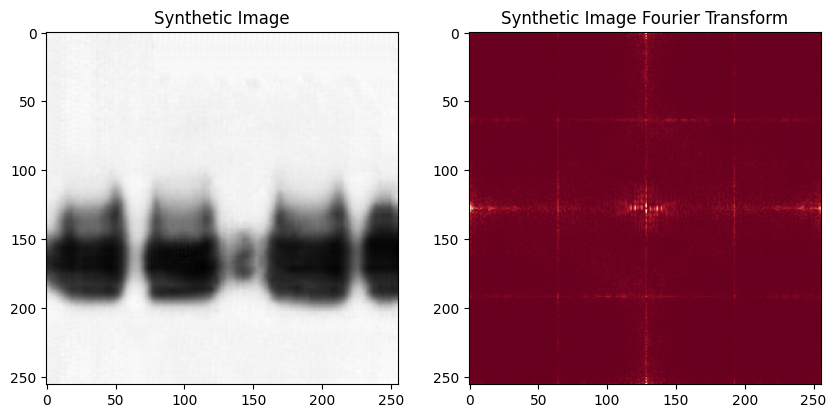

In [4]:
# Display Synthetic image side by their fourier transform
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(synthetic, cmap='gray')
ax[0].set_title("Synthetic Image")
res_noise = extract_residuum(synthetic)
fft_synthetic = normalize_spectrum( dft(res_noise))
ax[1].imshow(np.log1p(fft_synthetic), cmap='RdBu')
ax[1].set_title("Synthetic Image Fourier Transform")
plt.show()

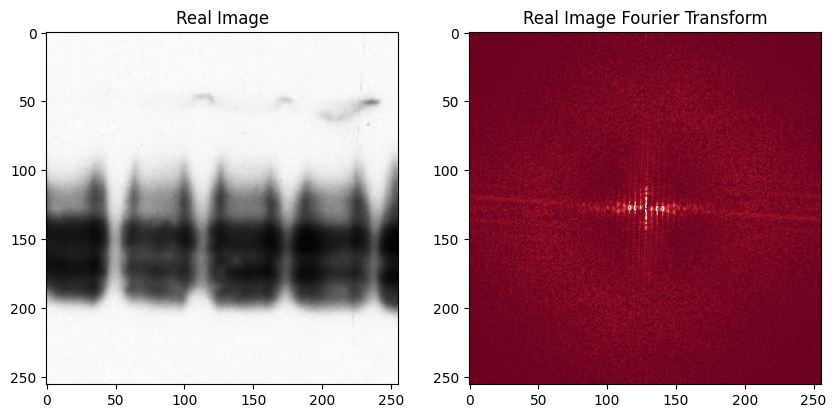

In [5]:
# Display Synthetic image side by their fourier transform
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(real, cmap='gray')
ax[0].set_title("Real Image")
res_noise = extract_residuum(real)
fft_real = normalize_spectrum( dft(res_noise))
ax[1].imshow(fft_real, cmap='RdBu')
ax[1].set_title("Real Image Fourier Transform")
plt.show()